In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
init_printing(use_unicode=True, wrap_line=False)

In [3]:
x, y, z = symbols("x y z")

In [4]:
def GradDescend(f, x0:np.ndarray, lr:float = 0.1, eps:float = 1e-06) -> np.ndarray:
    #Считаем производные прямо здесь
    _dx = [diff(f,x), diff(f,y)]
    print(_dx)
    res = []
    res.append(x0)
    while True:
        dx = np.array([float(_dx[0].subs(x, x0[0])), float(_dx[1].subs(y, x0[1]))])
        x0 = x0 - lr * dx
        res.append(x0)
        if np.linalg.norm(dx) < eps:
            break
    return res

In [5]:
def GradDesDynamicLR(f, x0:np.ndarray, lr:float = 0.1, eps:float = 1e-06, T:float = 80) -> np.ndarray:
    _dx = [diff(f,x), diff(f,y)]
    res = []
    res.append(x0)
    t = 0
    while True:
        dx = np.array([float(_dx[0].subs(x, x0[0])), float(_dx[1].subs(y, x0[1]))])
        x0 = x0 - lr * dx
        res.append(x0)
        #dynamic learning rate
        t += 1./T
        lr *= (1 - t / T)
        if np.linalg.norm(dx) < eps:
            break
        elif t >= T:
            break
    return res

In [6]:
def GradDesImpulse(f, x0:np.ndarray, lr:float = 0.1, eps:float = 1e-06) -> np.ndarray:

    return 0

In [7]:
def Adadelta(f, x0:np.ndarray, lr:float = 0.1, eps:float = 1e-06, T:float = 80, rho:float = 0.99) -> np.ndarray:
    _dx = [diff(f,x), diff(f,y)]
    #All results
    res = list()
    #square gradient average 
    sq_grad_average = np.zeros(x0.shape[0])
    #average parameter updates
    sq_para_average = np.zeros(x0.shape[0])
    
    for t in range(T):
        dx = np.array([float(_dx[0].subs(x, x0[0])), float(_dx[1].subs(y, x0[1]))])
        for i in range(dx.shape[0]):
            sq_grad_average[i] = (sq_grad_average[i] * rho) + ((dx[i]**2.0) * (1.0 - rho))
            
        x1 = list()
        for i in range(x0.shape[0]):
            #считаем Ut
            alpha = (eps + sqrt(sq_para_average[i])) / (eps + sqrt(sq_grad_average[i]))
            change = alpha * dx[i]
            sq_para_average[i] = (sq_para_average[i] * rho) + (change**2.0 * (1.0-rho))
            value = x0[i] - change
            x1.append(value)
        x0 = np.asarray(x1)
        res.append(x0)
    return res

In [8]:
function = 3*x ** 2 + 4 * y**2 + 23 * cos(x - 0.5)

In [9]:
out1 = np.array(GradDesDynamicLR(function, np.array([4, 4])))
#GradDescend
#GradDesDynamicLR
#GradDesImpulse
#Adadelta

In [10]:
def f(x, y):
    return 3*x ** 2 + 4 * y**2 + 23 * np.cos(x - 0.5)

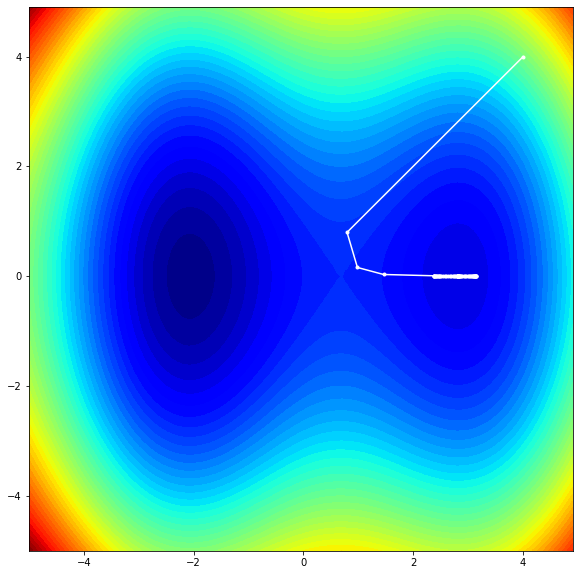

In [11]:
bounds = np.asarray([[-5.0, 5.0], [-5.0, 5.0]])
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
x, y = np.meshgrid(xaxis, yaxis)

ax = plt.figure(figsize=(10, 10)).add_subplot(111)
results = f(x, y)
plt.contourf(x, y, results, levels=60, cmap='jet')

solutions = np.asarray(out1)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
ax.set_aspect('equal', adjustable='box')
plt.show()